In [ ]:
import yfinance as yf 
import matplotlib.pyplot as plt

# Charger les données BTC-EUR
save = yf.Ticker("BTC-EUR")
# Récupérer les données historiques (ex: 1 an de données journalières)
df = save.history(period="10y", interval="1d")

df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-17 00:00:00+00:00,205.984818,215.195694,204.880493,213.655502,23998509,0.0,0.0
2015-02-18 00:00:00+00:00,213.804596,214.180115,203.753387,207.339890,22109844,0.0,0.0
2015-02-19 00:00:00+00:00,207.413589,213.619720,206.279663,211.479492,16080356,0.0,0.0
2015-02-20 00:00:00+00:00,211.451340,218.518753,210.465256,214.254715,20984971,0.0,0.0
2015-02-21 00:00:00+00:00,214.230972,224.397964,213.731766,214.918259,10796449,0.0,0.0


<Axes: xlabel='Date'>

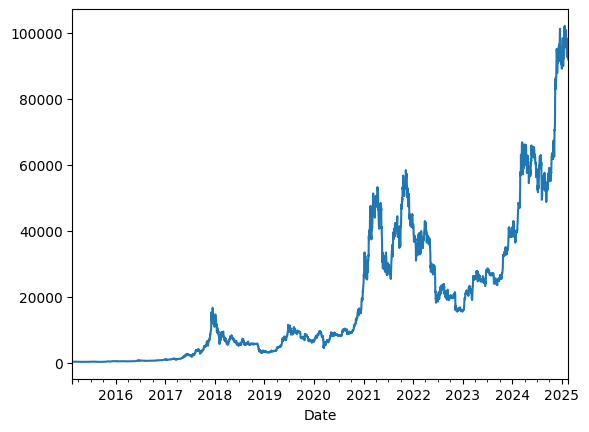

In [15]:
df['Close'].plot()

<Axes: xlabel='Date'>

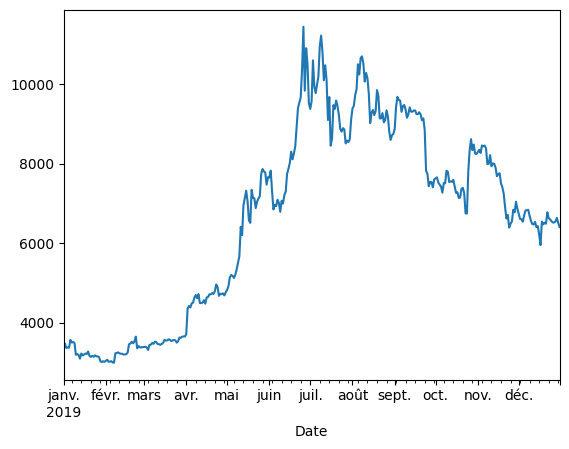

In [19]:
df.loc['2019','Close'].plot() 

<Axes: xlabel='Date'>

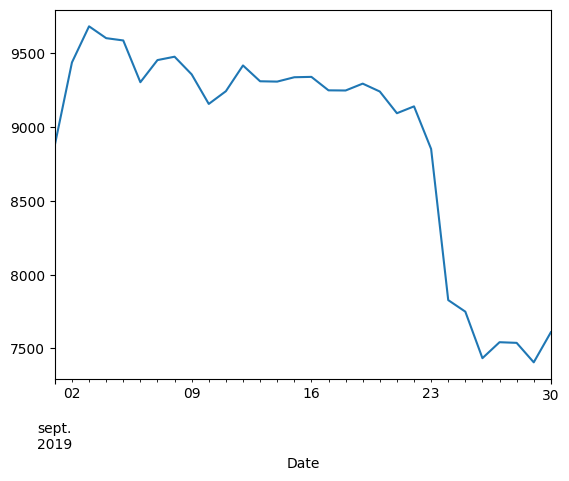

In [18]:
df.loc['2019-09','Close'].plot() 

C:\Users\qevan\AppData\Local\Temp\ipykernel_3212\2056987766.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.loc['2019','Close'].resample('M').mean().plot()


<Axes: xlabel='Date'>

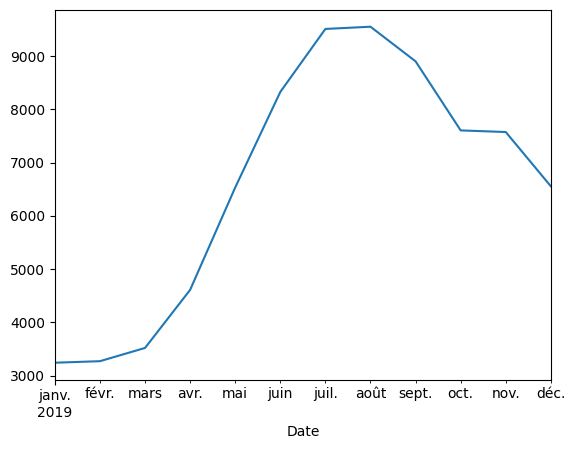

In [25]:
df.loc['2019','Close'].resample('M').mean().plot()

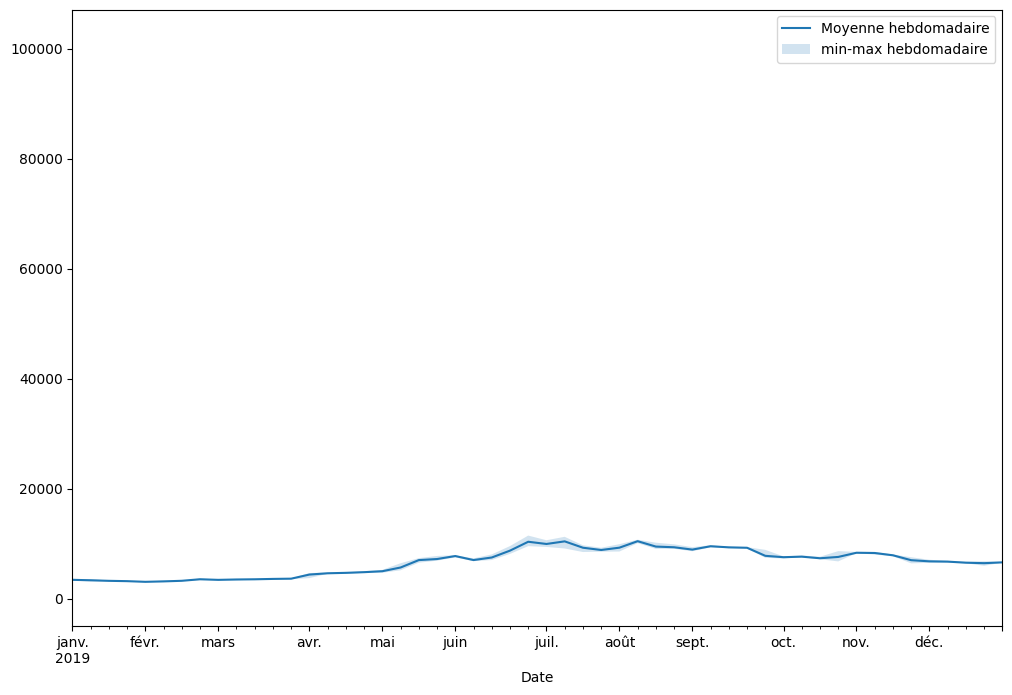

In [30]:
m=df['Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='Moyenne hebdomadaire')
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label='min-max hebdomadaire')
plt.legend()

Calculer les moyennes mobiles

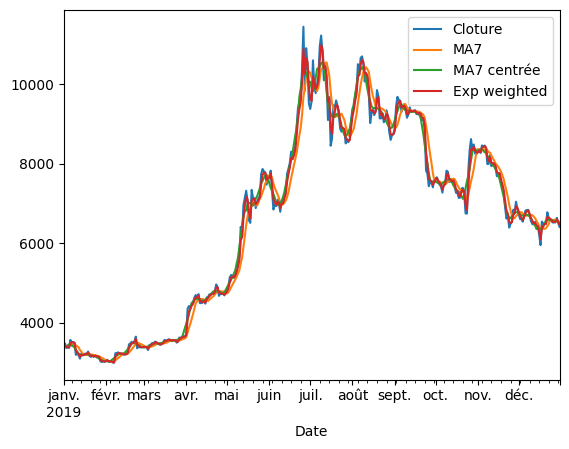

In [38]:
df.loc['2019','Close'].plot(label='Cloture')
df.loc['2019','Close'].rolling(window=7).mean().plot(label='MA7')
df.loc['2019','Close'].rolling(window=7,center=True).mean().plot(label='MA7 centrée')
df.loc['2019','Close'].ewm(alpha=0.6).mean().plot(label='Exp weighted')
plt.legend()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

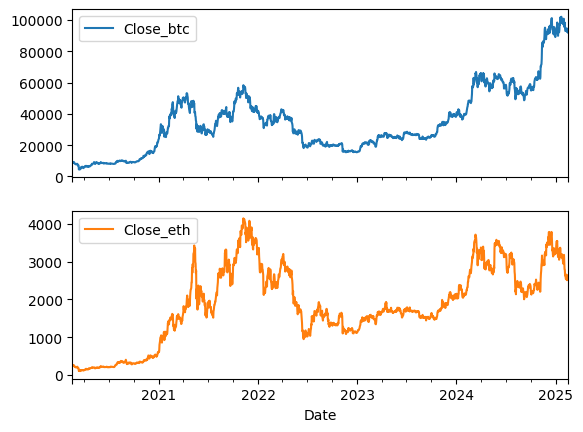

In [50]:
# Charger les données BTC-EUR
save = yf.Ticker("ETH-EUR")
# Récupérer les données historiques (ex: 1 an de données journalières)
df1 = save.history(period="5y", interval="1d")
import pandas as pd 
btc_eth=pd.merge(df,df1,on='Date',how='inner',suffixes=('_btc','_eth'))

btc_eth[['Close_btc','Close_eth']].plot(subplots=True)

In [51]:
btc_eth[['Close_btc','Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.828034
Close_eth,0.828034,1.000000
